In [195]:
import pandas as pd

In [196]:
import matplotlib.pyplot as plt 

## Loading manually labelled data

In [197]:
data = pd.read_csv('label_data.csv')

In [198]:
# storing length of columns ignoring column 'label'
col_len = data.shape[1]-1

# creating a new column list for the csv as there are no column names from MatLab
cols = [str(each+1)+'A' for each in range(int(col_len/2))] + [str(each+1)+'V' for each in range(int(col_len/2))]

# assigning new column names to the dataframe
data.columns = cols + ['label']

## Ploatting the data 

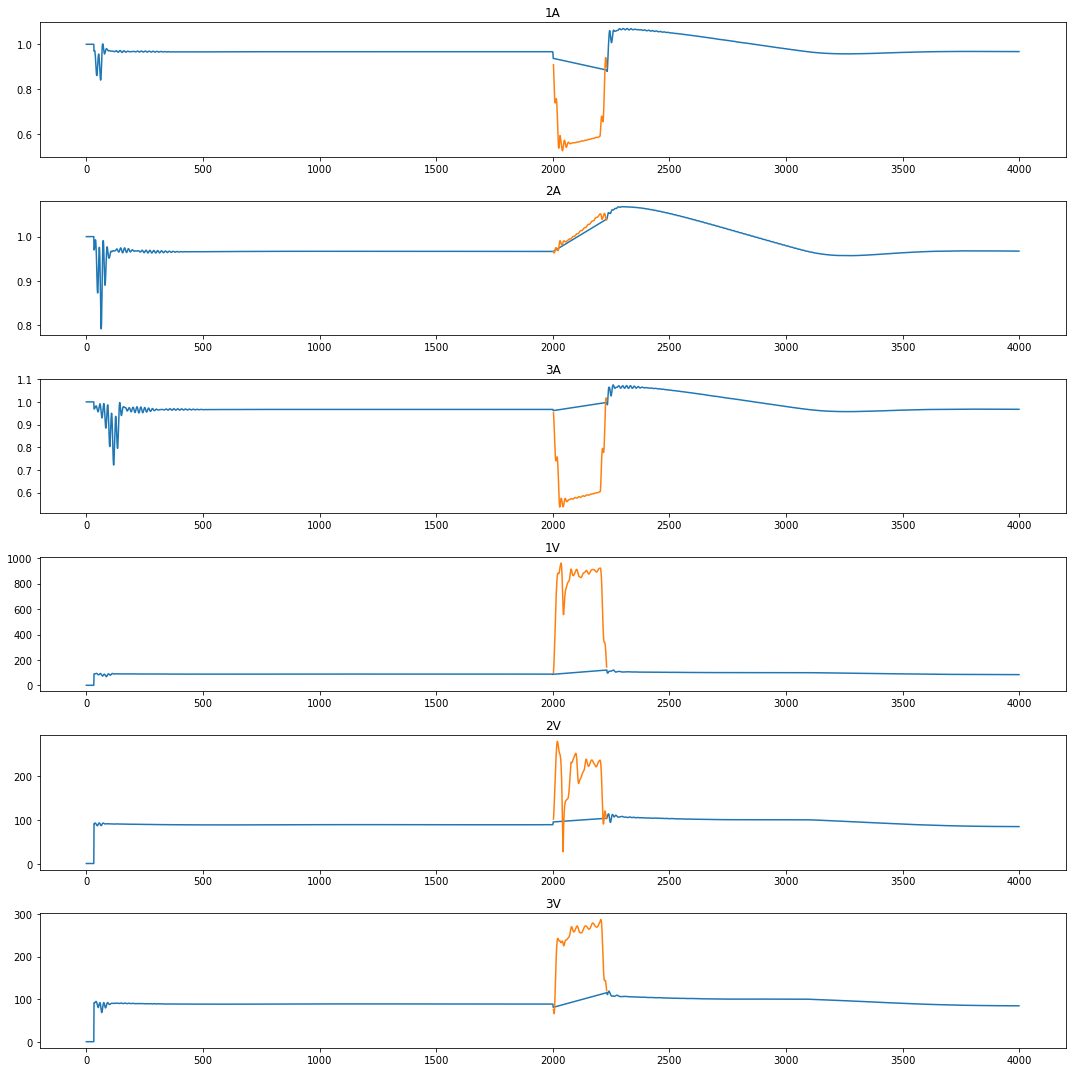

In [199]:
fig, ax = plt.subplots(6,figsize=(15,15))

normal = data[data.label == 'NML']
abnormal = data[data.label == 'AG']
for i in range(col_len):

    ax[i].plot(normal[cols[i]],"-")
    ax[i].plot(abnormal[cols[i]],"-")
    ax[i].set_title(cols[i])
fig.tight_layout()


## Creating SVM (support vector machine)

In [200]:
from sklearn import svm

In [201]:
# creating training set ignoring labels
train_data = data[cols]

# converting it to list of list from DataFrame
train_data = train_data.values.tolist()

In [202]:
# configuring and fitting the model
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(train_data[:3000], labels[:3000])

SVC(decision_function_shape='ovo')

In [203]:
# reading the new dataset from csv
# new dataset with changed simulation length and occurance time
new_data = pd.read_csv('ml_test.csv')
testing  = new_data.values.tolist()

In [204]:
# predicting the labels for new dataset
gend_labels = clf.predict(testing)

# adding predicted labels to new dataframe
new_data['label'] = gend_labels

In [205]:
# changing column names because MatLab does not assign the column names
new_data.columns = cols + ['label']

## Plotting predicted data

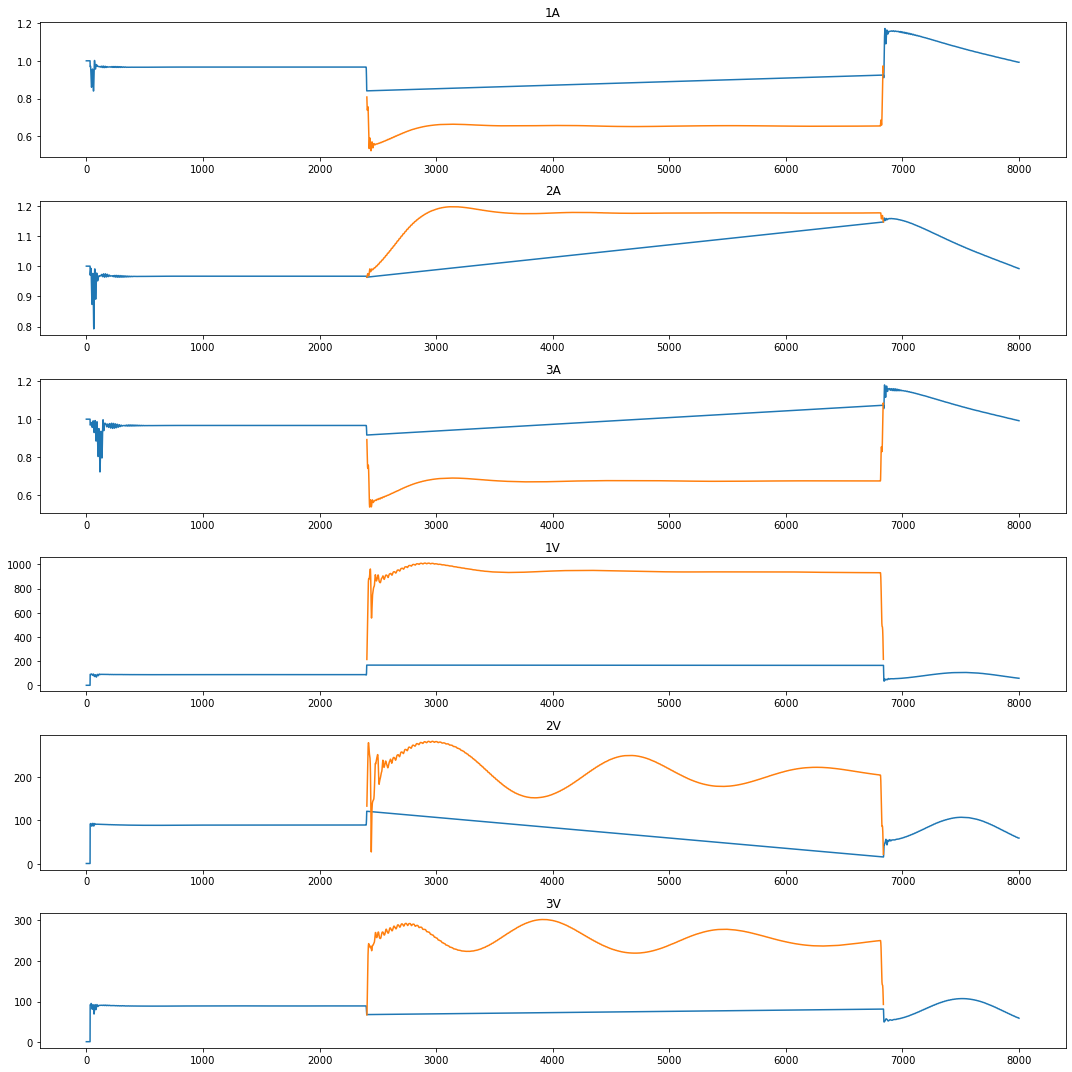

In [206]:
fig, ax = plt.subplots(6,figsize=(15,15))

normal = new_data[new_data.label == 'NML']
abnormal = new_data[new_data.label == 'AG']
for i in range(col_len):

    ax[i].plot(normal[cols[i]],"-")
    ax[i].plot(abnormal[cols[i]],"-")
    ax[i].set_title(cols[i])
fig.tight_layout()

## Simulation results of ampere

<img src="amp_simulation.png">

## Simulation results of voltage

<img src="voltage_simulation.png">